In [1]:
import autograd.numpy as np  
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [2]:
#Defining some activation functions and their derivative
def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

def mse(predict, y_train):
    return np.mean((predict - y_train) ** 2)

def mse_der(predict, y_train):
    return 2 * (predict - y_train) / np.prod(predict.shape)

def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=1)[:, np.newaxis]) #substract max per row, avoids instability
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]

def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

def softmax_der(z):
    return np.ones_like(z) 
#Purely placeholder, combined derivative 
#Cross entropy + softmax simplifies to predict-target

def cross_entropy(predict, target):
    return np.mean(-np.sum(target * np.log(predict + 1e-10), axis=1))

def cross_entropy_der(predict, target):
    return (predict - target) / predict.shape[0]

(400, 1)
(400, 1)
(360, 1)
(360, 1)
[(array([[-0.00242531, -0.00256143, -0.00032529,  0.00214671,  0.00294274,
         0.00048164,  0.00148086,  0.00159402,  0.0007194 , -0.00406939,
        -0.0030585 , -0.00093537,  0.00090556, -0.00231065,  0.0013334 ,
        -0.00396476,  0.0005119 ,  0.00598192,  0.00090468, -0.00124766,
        -0.00071889, -0.00110523, -0.00124568,  0.00435866,  0.00099756,
        -0.00077552,  0.00128127,  0.00175479,  0.00066926, -0.00038285,
        -0.00188161,  0.0003282 ,  0.00209086, -0.0007917 ,  0.00021405,
         0.00185235,  0.00113734,  0.00052694,  0.00076571,  0.00168687,
        -0.00133296, -0.00607179, -0.00070467, -0.00179643, -0.00161612,
         0.00233563,  0.00260298, -0.00277386, -0.00196831, -0.00221459]]), array([-1.04893560e-02, -1.71681800e-02,  7.14834653e-05,  1.09880366e-02,
        1.69875228e-02,  2.28749169e-03,  7.03856199e-03,  1.31960211e-02,
        4.99188720e-03, -2.17240112e-02, -1.45645251e-02, -3.30201105e-03,
    

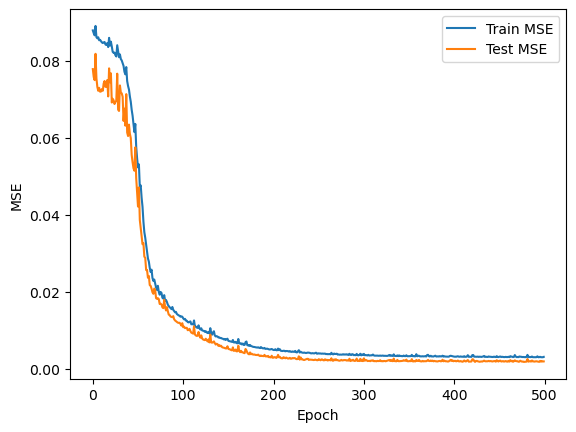

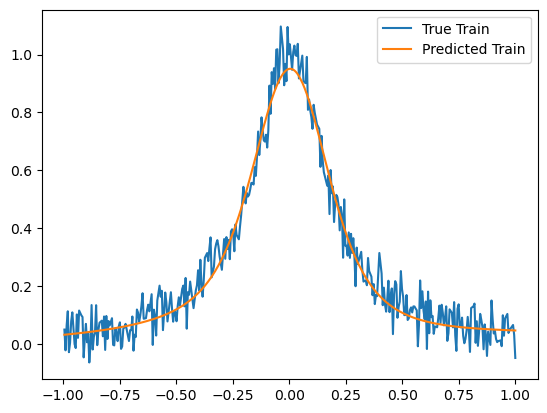

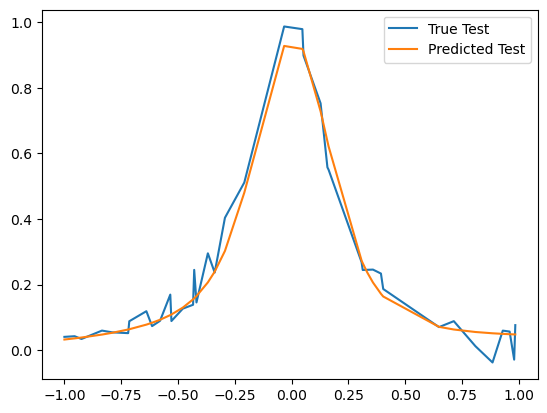

([(array([[-0.01510767,  2.33385628,  0.0259181 , -0.27356888,  1.93967171,
            2.19696429,  0.10512143,  2.36904635, -1.06093998, -0.92476309,
            0.04516583,  0.68520772,  0.63753751, -0.22638068,  3.02870255,
           -0.3300042 , -1.37889284,  0.48147675, -0.21698977,  1.25161814,
           -2.9555969 , -1.96851079, -3.15447728,  1.32842701, -0.10115287,
            0.60070283, -0.83950088,  0.05112026, -2.58020449, -3.07864477,
            2.17198316,  4.13864046,  2.37124175, -1.47478747,  0.48093822,
            2.44654082, -2.22060538, -2.36465678,  0.53740605, -1.56384149,
           -3.35322773,  1.72757801,  2.82829433, -0.39101964, -0.50267941,
            1.71365151,  0.67303913, -0.47663497, -2.60208997, -0.63725579]]),
   array([ 0.02442097, -0.04616745,  0.03003421,  0.01129416, -0.05053642,
          -0.04721165, -0.01581649, -0.02337692, -0.00495261,  0.05415212,
           0.09774626, -0.02098299,  0.04273545,  0.01633104, -0.10048889,
          -0

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np  # Regular np is fine here
import matplotlib.pyplot as plt

def runge(x):
    return 1 / (1 + 25 * x**2)

batch_size = 400
x = np.linspace(-1, 1, batch_size).reshape(-1, 1)
y = runge(x) + 0.05 * np.random.normal(0, 1, batch_size).reshape(-1, 1)

network_input_size = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)

# Better init (He for ReLU)
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []
    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        std = np.sqrt(2 / i_size)  # He init
        W = np.random.randn(i_size, layer_output_size) * std  # Flipped dims for clarity
        b = np.zeros(layer_output_size)
        layers.append((W, b))
        i_size = layer_output_size
    return layers

# Update forward/backprop for new W shape (x @ W)
def feed_forward_saver_batch(x, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W + b
        a = activation_func(z)
        zs.append(z)
    return layer_inputs, zs, a

def feed_forward(x, layers, activation_funcs):
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

def backpropagation_batch(x, layers, activation_funcs, y, activation_ders, cost_der=mse_der):
    layer_inputs, zs, predict = feed_forward_saver_batch(x, layers, activation_funcs)
    layer_grads = [() for _ in layers]
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        if i == len(layers) - 1:
            dC_da = cost_der(predict, y)
        else:
            (W_next, _) = layers[i + 1]
            dC_da = dC_dz @ W_next.T
        dC_dz = dC_da * activation_der(z)
        dC_dW = layer_input.T @ dC_dz
        dC_db = np.sum(dC_dz, axis=0)
        layer_grads[i] = (dC_dW, dC_db)
    return layer_grads

layer_output_sizes = [50, 50, 1]
activation_funcs = [ReLU, ReLU, lambda x: x]  # ReLU hidden, linear output
activation_ders = [ReLU_der, ReLU_der, lambda x: np.ones_like(x)]

activation_funcs = [sigmoid, sigmoid, lambda x: x]  # ReLU hidden, linear output
activation_ders = [sigmoid_der, sigmoid_der, lambda x: np.ones_like(x)]

learning_rate = 0.1
epochs = 500
train_batch_size = 18  # Add mini-batching

layers = create_layers_batch(network_input_size, layer_output_sizes)
comp = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)
print(comp)

def train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, batch_size=32):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        # Shuffle
        perm = np.random.permutation(x_train.shape[0])
        x_shuffled = x_train[perm]
        y_shuffled = y_train[perm]
        
        # Mini-batch loop
        for start in range(0, x_train.shape[0], batch_size):
            end = min(start + batch_size, x_train.shape[0])
            input_batch = x_shuffled[start:end]
            target_batch = y_shuffled[start:end]
            
            layers_grad = backpropagation_batch(input_batch, layers, activation_funcs, target_batch, activation_ders, cost_der=mse_der)
            for (W, b), (W_g, b_g) in zip(layers, layers_grad):
                W -= learning_rate * W_g
                b -= learning_rate * b_g
        
        # Losses
        train_pred = feed_forward(x_train, layers, activation_funcs)
        test_pred = feed_forward(x_test, layers, activation_funcs)
        train_mse = mse(train_pred, y_train)
        test_mse = mse(test_pred, y_test)
        train_losses.append(train_mse)
        test_losses.append(test_mse)
        print(f"Epoch {epoch+1}, Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
    
    # Plot losses
    plt.plot(train_losses, label='Train MSE')
    plt.plot(test_losses, label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
    # Plot predictions (sorted for curve visualization)
    sort_idx_train = np.argsort(x_train[:, 0])
    plt.plot(x_train[sort_idx_train], y_train[sort_idx_train], label='True Train')
    plt.plot(x_train[sort_idx_train], train_pred[sort_idx_train], label='Predicted Train')
    plt.legend()
    plt.show()
    
    sort_idx_test = np.argsort(x_test[:, 0])
    plt.plot(x_test[sort_idx_test], y_test[sort_idx_test], label='True Test')
    plt.plot(x_test[sort_idx_test], test_pred[sort_idx_test], label='Predicted Test')
    plt.legend()
    plt.show()
    
    return layers, train_losses, test_losses

train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, train_batch_size)

In [4]:
"""
#Gradient verification with autograd
network_input_size = 4
batch_size = 400
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]
la = create_layers_batch(network_input_size, layer_output_sizes)

x = np.random.randn(batch_size, network_input_size)
input = x
target = np.random.rand(4)

computed = backpropagation_batch(input, la, activation_funcs, target, activation_ders)
print(computed[-1][0][0])

#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)
cost_grad = grad(cost, 1)
autoG = cost_grad(input, la, activation_funcs, target)
print(autoG[-1][0][0])

diff = 0
for i in range(len(computed)):
    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])
if diff <= 10**-6:
    print("Same gradients")

#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)
"""


'\n#Gradient verification with autograd\nnetwork_input_size = 4\nbatch_size = 400\nlayer_output_sizes = [3, 4]\nactivation_funcs = [sigmoid, ReLU]\nactivation_ders = [sigmoid_der, ReLU_der]\nla = create_layers_batch(network_input_size, layer_output_sizes)\n\nx = np.random.randn(batch_size, network_input_size)\ninput = x\ntarget = np.random.rand(4)\n\ncomputed = backpropagation_batch(input, la, activation_funcs, target, activation_ders)\nprint(computed[-1][0][0])\n\n#Verify gradients\ndef cost(x_train, layers, activation_funcs, y_train):\n    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]\n    return mse(predict, y_train)\ncost_grad = grad(cost, 1)\nautoG = cost_grad(input, la, activation_funcs, target)\nprint(autoG[-1][0][0])\n\ndiff = 0\nfor i in range(len(computed)):\n    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])\nif diff <= 10**-6:\n    print("Same gradients")\n\n#Verify gradients\ndef cost(x_train, layers, activation_funcs, y_train):\n    